In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


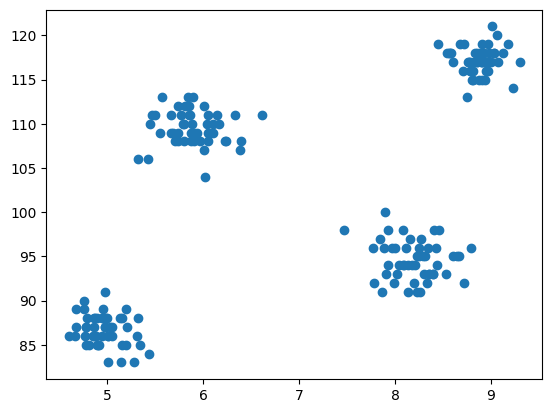

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

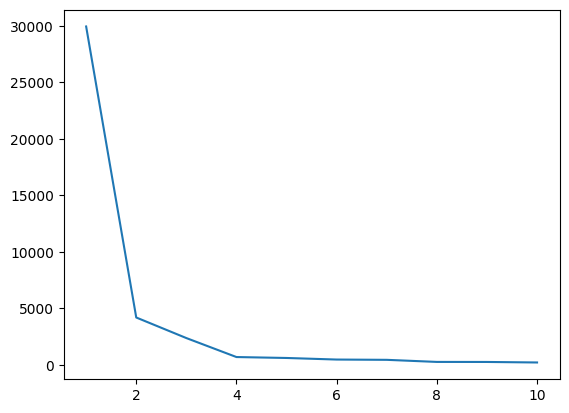

In [7]:
plt.plot(range(1,11),wcss)

In [8]:
X = df.iloc[:,:].values
# from above
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [9]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

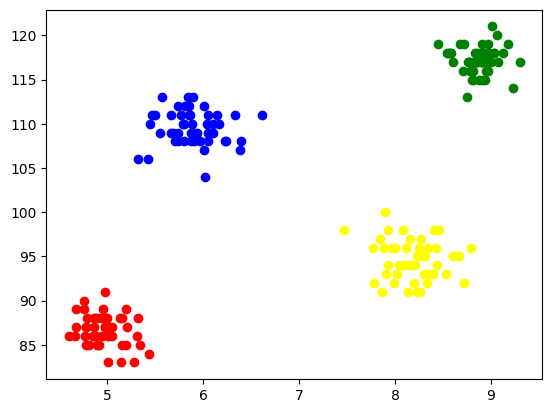

In [10]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means on 3-D Data

In [11]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [12]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [13]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

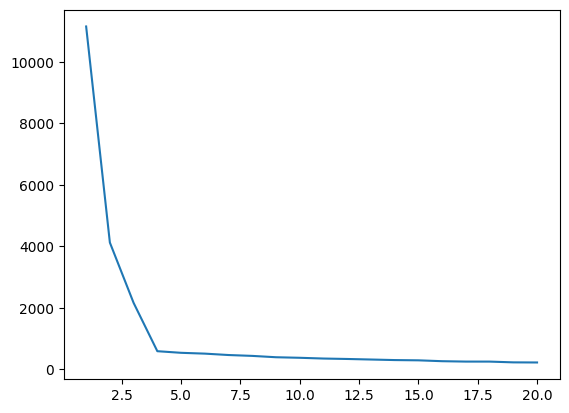

In [14]:
plt.plot(range(1,21),wcss)

In [15]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [16]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [17]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()